<a href="https://colab.research.google.com/github/deltathrs/Lab_SC01/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolation

In [ ]:
# Python code in case you want to follow along

# Importing Python packages
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
hours = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.]
temperature_celcius = [22, 20.5, 19, 18.5, 18, 18, 18.5, 19, 21, 23, 24, 24.5, 25, 26, 27, 28, 28, 26, 24.5, 23, 22, 22, 21.5, 21, 22]

# Creating a pandas dataframe
data = pd.DataFrame({'hours': hours, 'temp': temperature_celcius })

# Printing the data
data

,hours,temp
0,0.0,22.0
1,1.0,20.5
2,2.0,19.0
3,3.0,18.5
4,4.0,18.0
5,5.0,18.0
6,6.0,18.5
7,7.0,19.0
8,8.0,21.0
9,9.0,23.0


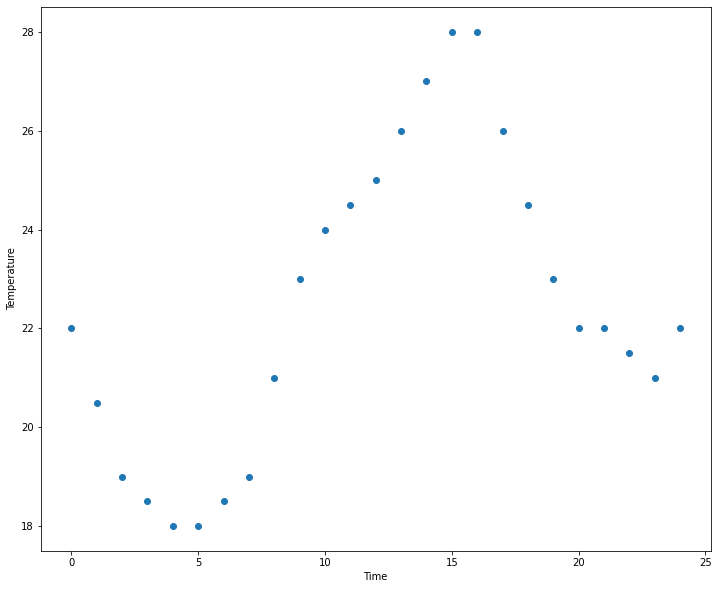

In [ ]:
# Creating a scatter plot from the temperature per hour
plt.figure(figsize=(12, 10))
plt.scatter(data.hours, data.temp)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Linear Interpolation

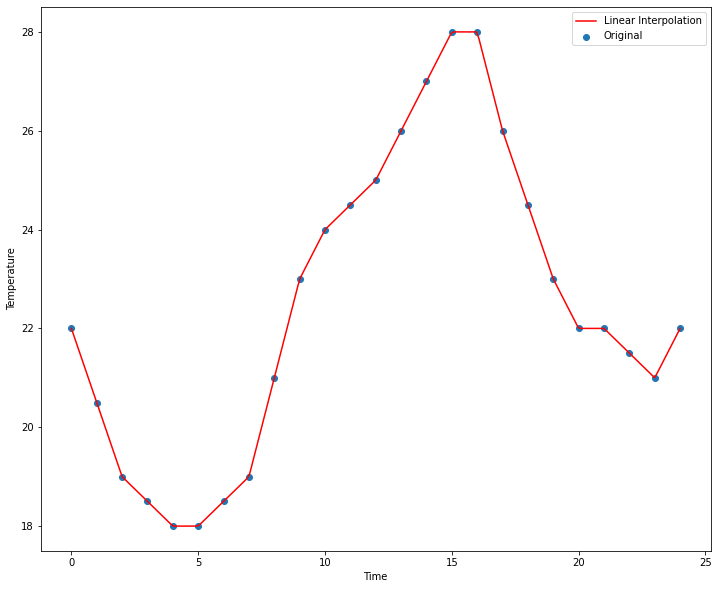

In [ ]:
# Import Python packages for interpolation
import numpy as np
import scipy.interpolate as interpolate

# Create a linear interpolation function based on the original data
linear_interpolation_func = interpolate.interp1d(data.hours, data.temp, kind='linear')

# Create a list with 10 'time' values per hour (6-minute interval) 
in_between_hours_scale = np.linspace(0., 24., 24*10)

# Interpolate the temperature on the 6-minute scale
linear_interpolated_y = linear_interpolation_func(in_between_hours_scale)

# Plot the result
plt.figure(figsize=(12,10))
plt.scatter(data.hours, data.temp)
plt.plot(in_between_hours_scale, linear_interpolated_y, 'red')
plt.legend(['Linear Interpolation', 'Original'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

NN Interpolaton

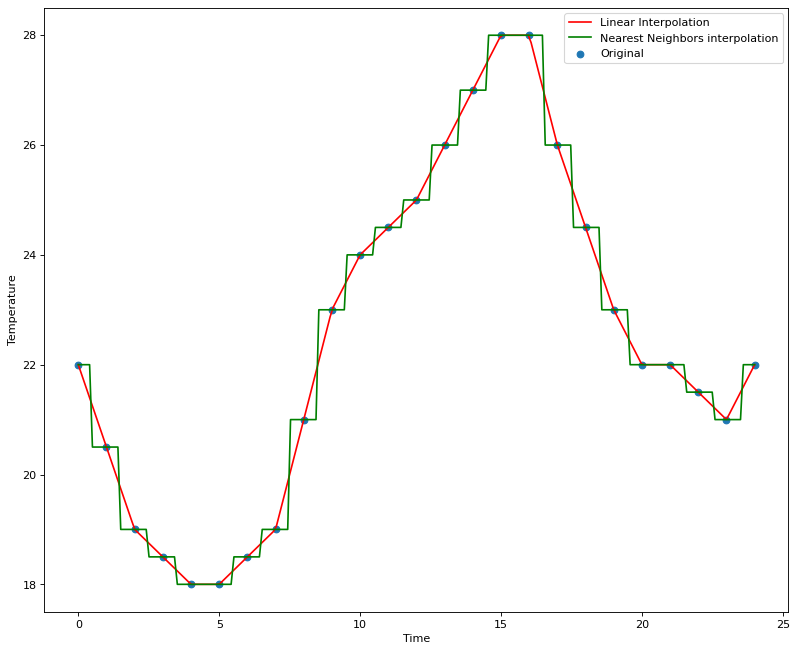

In [ ]:
# Create an interpolation function for Nearest Neighbors interpolation
nearestneighbors_interpolation_func = interpolate.interp1d(list(data.hours), list(data.temp), kind='nearest')

# Use the 6-mitue scale from before to interpolate values using the Nearest Neighbors interpolation function
nearestneighbors_interpolated_y = nearestneighbors_interpolation_func(in_between_hours_scale)

# Plot the results of the Nearest Neighbors interpolation on top of the Linear interpolation
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(data.hours, data.temp)
plt.plot(in_between_hours_scale, linear_interpolated_y, 'red')
plt.plot(in_between_hours_scale, nearestneighbors_interpolated_y, 'green')
plt.legend(['Linear Interpolation', 'Nearest Neighbors interpolation', 'Original'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Polynomial Interpolation

An example of a polynomial of degree 2


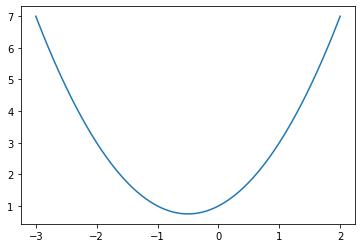

In [ ]:
# degree 2 is a parabola
x = np.linspace(-3, 2, 1000)
degree_2_polynomial = lambda x: 1 + x + x**2
plt.plot(x, [degree_2_polynomial(i) for i in x])

An example of a polynomial of degree 3


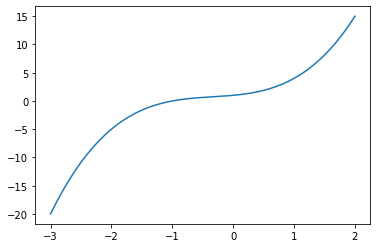

In [ ]:
# degree 3 is a cubic
degree_3_polynomial = lambda x: 1 + x + x**2 + x**3
plt.plot(x, [degree_3_polynomial(i) for i in x])

An example of a polynomial of degree 6

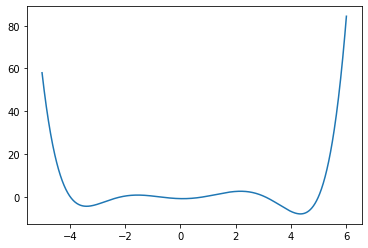

In [ ]:
x = np.linspace(-5, 6, 1000)
degree_6_polynomial = lambda x: 1/100 * (x**6 - 2*x**5 - 26*x**4 + 28*x**3 + 145*x**2 - 26*x - 80)
plt.plot(x, [degree_6_polynomial(i) for i in x])

Newton Polynomial Interpolation in Python


In [ ]:
# Credits to stack overflow for this code

def _poly_newton_coefficient(x, y):    
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

Text(0.5, 1.0, 'Newton Polynomial Interpolation solves the simple example')

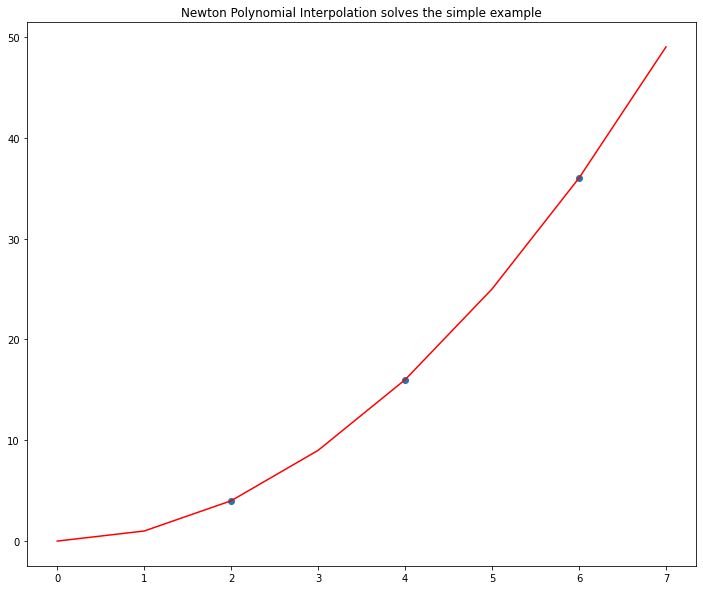

In [ ]:
# Computing the Newton Polynomial Interpolation
newton_interpolation = newton_polynomial([2., 4., 6.], [4., 16., 36.], np.array([0., 1., 2., 3., 4., 5., 6., 7.]))

# Plotting the Newton Polynomial against the original data
plt.figure(figsize=(12,10))
plt.scatter([2., 4., 6.], [4., 16., 36.])
plt.plot([0., 1., 2., 3., 4., 5., 6., 7.], newton_interpolation, 'red')
plt.title('Newton Polynomial Interpolation solves the simple example')

Text(0.5, 1.0, 'Newton Polynomial Interpolation finds a very complex polynomial that fits the data')

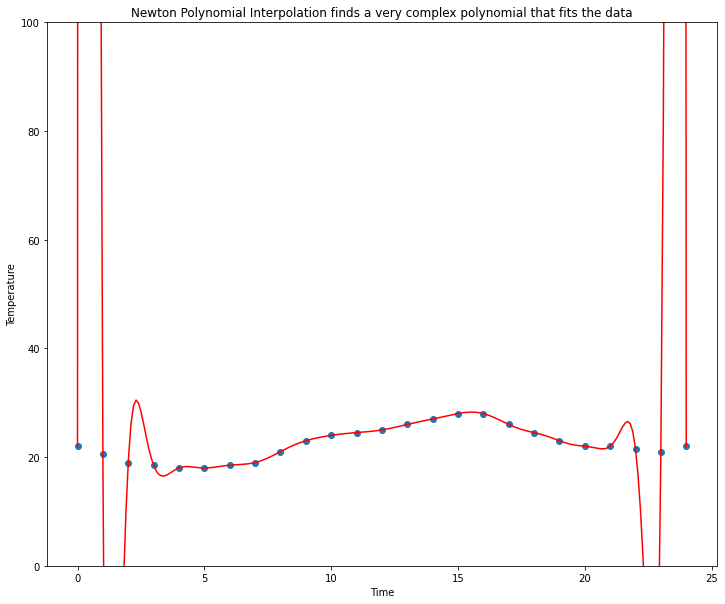

In [ ]:
# Computing the Newton Polynomial Interpolation
newton_interpolation = newton_polynomial(list(data.hours), list(data.temp), in_between_hours_scale)

# Plotting the Newton Polynomial against the original data
plt.figure(figsize=(12,10))
plt.scatter(list(data.hours), list(data.temp))
plt.plot(in_between_hours_scale, newton_interpolation, 'red')
plt.ylim(0, 100)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Newton Polynomial Interpolation finds a very complex polynomial that fits the data')


Cubic Spline Interpolation in Python


In [ ]:
import scipy as scipy

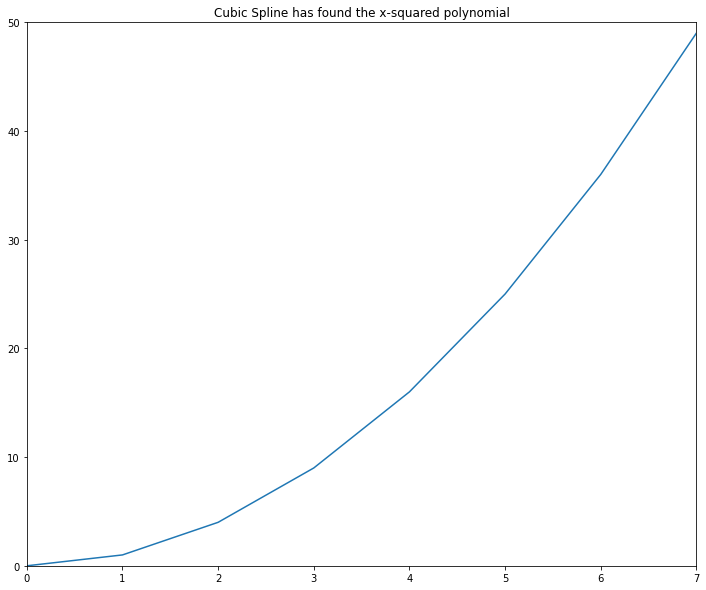

In [ ]:
# Computing the Cubic Spline Interpolation
cubic_spline_interpolation = scipy.interpolate.CubicSpline([2., 4., 6.], [4., 16., 36.])

# Show the interpolated values: x squared has been found correctly
plt.figure(figsize=(12,10))
plt.plot([0., 1., 2., 3., 4., 5., 6., 7.], cubic_spline_interpolation([0., 1., 2., 3., 4., 5., 6., 7.]))
plt.xlim(0,7)
plt.ylim(0,50)
plt.title( 'Cubic Spline has found the x-squared polynomial')
plt.show()

Text(0.5, 1.0, 'Cubic Spline Interpolation finds a perfectly fitting function: smooth and simple')

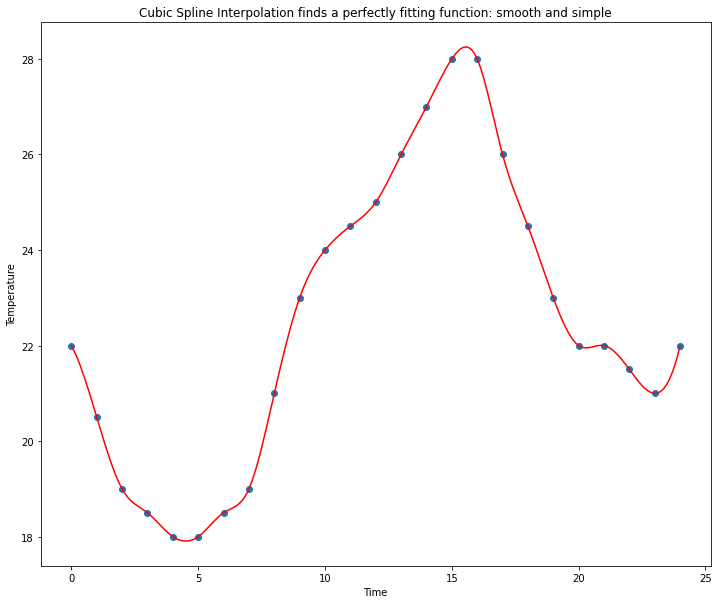

In [ ]:
# Computing the Cubic Spline Interpolation
cubic_spline_interpolation = scipy.interpolate.CubicSpline(list(data.hours), list(data.temp))(in_between_hours_scale)

# Plotting the Cubic Spline against the original data
plt.figure(figsize=(12,10))
plt.scatter(list(data.hours), list(data.temp))
plt.plot(in_between_hours_scale, cubic_spline_interpolation, 'red')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Cubic Spline Interpolation finds a perfectly fitting function: smooth and simple')